In [7]:
import pandas as pd

sales_transactions = pd.read_csv("sales_transactions.csv")
regions = pd.read_csv("regions.csv")


# Merging sales_transactions with regions using "Region ID"
sales_transactions = sales_transactions.merge(regions, on="Region ID", how="left")


# Group sales data by Region and sum Total Sales
regional_sales = sales_transactions.groupby("Region Name")["Total Sales"].sum().reset_index()


# Sort by Sales in descending order
regional_sales = regional_sales.sort_values(by="Total Sales", ascending=False)


print(regional_sales)

  Region Name  Total Sales
0     Central  22692755.70
2       North  22597164.97
4        West  22395814.66
3       South  22331110.63
1        East  22116764.45


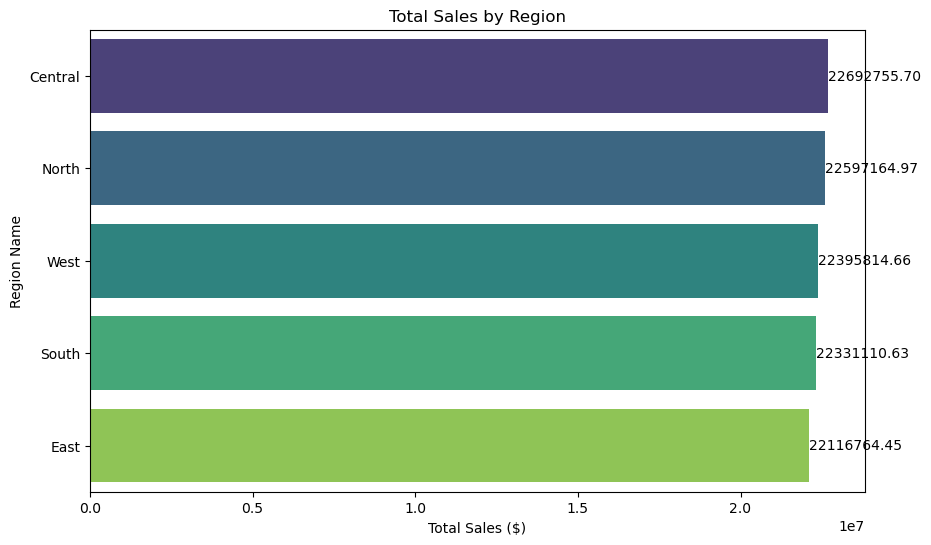

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Total Sales", y="Region Name", data=regional_sales, hue="Region Name", palette="viridis", legend=False)

# Add labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f")  # Display values with 2 decimal places

# Titles and labels
plt.xlabel("Total Sales ($)")
plt.ylabel("Region Name")
plt.title("Total Sales by Region")


plt.show()

In [45]:
import pandas as pd

# Convert Order Date to datetime
sales_transactions["Order Date"] = pd.to_datetime(sales_transactions["Order Date"])

# Extract Year and Month
sales_transactions["Year"] = sales_transactions["Order Date"].dt.year
sales_transactions["Month"] = sales_transactions["Order Date"].dt.month

print(sales_transactions[["Order Date", "Year", "Month"]].head())

           Order Date  Year  Month
0 2023-01-01 00:00:00  2023      1
1 2023-01-01 01:00:00  2023      1
2 2023-01-01 02:00:00  2023      1
3 2023-01-01 03:00:00  2023      1
4 2023-01-01 04:00:00  2023      1


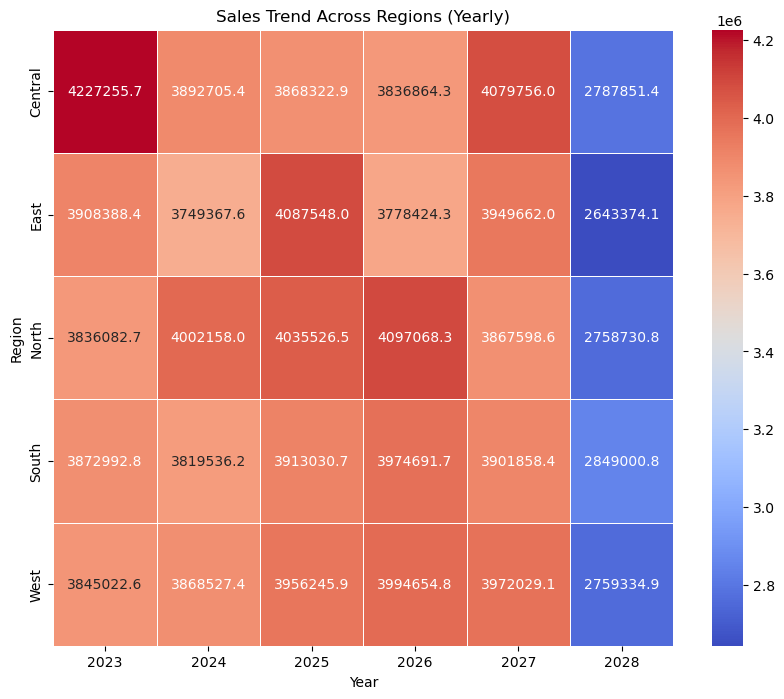

In [47]:
# Pivot table: Total Sales by Region and Year
sales_pivot = sales_transactions.pivot_table(index="Region Name", columns="Year", values="Total Sales", aggfunc="sum")


# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sales_pivot, annot=True, fmt=".1f", cmap="coolwarm", linewidths=0.5)

# Title
plt.title("Sales Trend Across Regions (Yearly)")
plt.xlabel("Year")
plt.ylabel("Region")


plt.show()
